In [1]:
import requests
import pandas as pd
import numpy as np

# Season Numbers

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [3]:
#move data from jsons files to pandas Dataframes. 
elements_df = pd.DataFrame(json['elements']) #Player stats
elements_types_df = pd.DataFrame(json['element_types']) #player descs
teams_df = pd.DataFrame(json['teams']) #team descs

In [4]:
#check what variables are available
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [5]:
elements_types_df

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],74
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],229
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],262
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],85


In [6]:
teams_df.head() #maybe use strength later on

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1190,1210,1170,1210,1190,1200,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1150,1160,1150,1150,1180,1210,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,...,None,False,0,1080,1100,1150,1180,1090,1100,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,...,None,False,0,1050,1080,1120,1190,1010,1030,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,...,None,False,0,1260,1280,1240,1280,1270,1310,4


In [7]:
# we select the following columns to our "slim" df, more can be added
slim_elements_df = elements_df[['first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes','goals_scored','assists','bps','clean_sheets','transfers_in','transfers_out','transfers_in_event','transfers_out_event','value_season','value_form','form','total_points','direct_freekicks_order','penalties_order']]
#change some category numbers to more descriptive vars, change back before forecasting
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name_short)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').short_name)
#some numbers are not floats but objects
slim_elements_df['ptPerMil'] = slim_elements_df.value_season.astype(float)
slim_elements_df['formPerMil'] = slim_elements_df.value_form.astype(float)
slim_elements_df['form'] = slim_elements_df.form.astype(float)
slim_elements_df['ptPerMil'] = slim_elements_df.value_season.astype(float)
slim_elements_df = slim_elements_df.drop(["element_type","value_season","value_form"],axis=1) #more descriptive names used
slim_elements_df.head()

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,...,transfers_out,transfers_in_event,transfers_out_event,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil
0,Mesut,Özil,ARS,0.5,67,0,0,0,0,0,...,53846,0,72,0.0,0,NaN,NaN,MID,0.0,0.0
1,Sokratis,Papastathopoulos,ARS,0.1,48,0,0,0,0,0,...,18977,0,9,0.0,0,NaN,NaN,DEF,0.0,0.0
2,David,Luiz Moreira Marinho,ARS,0.8,54,839,0,0,143,3,...,94653,3190,555,4.8,28,4.0,NaN,DEF,5.2,0.9
3,Pierre-Emerick,Aubameyang,ARS,6.5,113,1514,5,1,202,7,...,3257623,1020,8996,4.5,71,NaN,1.0,MID,6.3,0.4
4,Cédric,Soares,ARS,0.3,46,275,0,1,71,2,...,37105,3793,403,4.8,20,NaN,NaN,DEF,4.3,1.0


In [8]:
slim_elements_df['first_name'] = slim_elements_df.first_name + " " + slim_elements_df.second_name

In [9]:
#net transfers should be good enough, if needed at all
slim_elements_df['net_transfers'] = slim_elements_df['transfers_in'] - slim_elements_df['transfers_out']
slim_elements_df['net_transfers_event'] = slim_elements_df['transfers_in_event'] - slim_elements_df['transfers_out_event']
slim_elements_df = slim_elements_df.drop(["transfers_in","transfers_out","transfers_in_event","transfers_out_event"],axis=1)

slim_elements_df.head()

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
0,Mesut Özil,Özil,ARS,0.5,67,0,0,0,0,0,0.0,0,NaN,NaN,MID,0.0,0.0,-50405,-72
1,Sokratis Papastathopoulos,Papastathopoulos,ARS,0.1,48,0,0,0,0,0,0.0,0,NaN,NaN,DEF,0.0,0.0,-8711,-9
2,David Luiz Moreira Marinho,Luiz Moreira Marinho,ARS,0.8,54,839,0,0,143,3,4.8,28,4.0,NaN,DEF,5.2,0.9,-46910,2635
3,Pierre-Emerick Aubameyang,Aubameyang,ARS,6.5,113,1514,5,1,202,7,4.5,71,NaN,1.0,MID,6.3,0.4,-2695576,-7976
4,Cédric Soares,Soares,ARS,0.3,46,275,0,1,71,2,4.8,20,NaN,NaN,DEF,4.3,1.0,-24325,3390


In [10]:
idle_players = slim_elements_df.loc[slim_elements_df.minutes < 180]['first_name'] #names of players not yet played at least 2 games
idle_players.head()

0                    Mesut Özil
1     Sokratis Papastathopoulos
6              Shkodran Mustafi
11               Calum Chambers
12               Sead Kolasinac
Name: first_name, dtype: object

In [11]:
slim_elements_df

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
0,Mesut Özil,Özil,ARS,0.5,67,0,0,0,0,0,0.0,0,NaN,NaN,MID,0.0,0.0,-50405,-72
1,Sokratis Papastathopoulos,Papastathopoulos,ARS,0.1,48,0,0,0,0,0,0.0,0,NaN,NaN,DEF,0.0,0.0,-8711,-9
2,David Luiz Moreira Marinho,Luiz Moreira Marinho,ARS,0.8,54,839,0,0,143,3,4.8,28,4.0,NaN,DEF,5.2,0.9,-46910,2635
3,Pierre-Emerick Aubameyang,Aubameyang,ARS,6.5,113,1514,5,1,202,7,4.5,71,NaN,1.0,MID,6.3,0.4,-2695576,-7976
4,Cédric Soares,Soares,ARS,0.3,46,275,0,1,71,2,4.8,20,NaN,NaN,DEF,4.3,1.0,-24325,3390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Andreas Söndergaard,Söndergaard,WOL,0.3,40,0,0,0,0,0,0.0,0,NaN,NaN,GKP,0.0,0.0,18155,852
646,Patrick Cutrone,Cutrone,WOL,0.0,59,23,0,0,5,0,0.5,2,NaN,NaN,FWD,0.3,0.1,701,-283
647,Nigel Lonwijk,Lonwijk,WOL,0.0,40,0,0,0,0,0,0.0,0,NaN,NaN,DEF,0.0,0.0,472,-15
648,Willian José Da Silva,Da Silva,WOL,0.1,70,108,0,0,6,0,1.5,3,NaN,NaN,FWD,0.4,0.2,11178,2779


In [12]:
#lets drop all players that have not yet played 2 games (=180 minutes)
slim_elements_df = slim_elements_df.loc[slim_elements_df.minutes >= 180]

In [13]:
#top 10 points per million 
slim_elements_df.sort_values('ptPerMil',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
35,Emiliano Martínez,Martínez,AVL,33.4,51,1710,0,0,444,10,5.0,103,NaN,NaN,GKP,20.2,1.0,1910165,48241
601,Tomas Soucek,Soucek,WHU,18.5,53,1890,7,1,333,7,5.0,97,NaN,NaN,MID,18.3,0.9,1063974,19126
120,Nick Pope,Pope,BUR,10.9,54,1710,0,0,418,7,4.6,98,NaN,NaN,GKP,18.1,0.9,-336419,-3464
296,Patrick Bamford,Bamford,LEE,47.3,66,1695,11,7,388,6,6.0,119,NaN,1.0,FWD,18.0,0.9,2941889,35061
50,Matt Targett,Targett,AVL,7.4,47,1694,0,3,385,11,7.0,84,6.0,NaN,DEF,17.9,1.5,486911,72422
7,Bernd Leno,Leno,ARS,9.3,50,1890,0,0,407,8,5.5,89,NaN,NaN,GKP,17.8,1.1,54942,14992
588,Aaron Cresswell,Cresswell,WHU,21.3,55,1890,0,8,453,7,4.8,96,1.0,NaN,DEF,17.5,0.9,1489843,98568
294,Stuart Dallas,Dallas,LEE,13.4,48,1790,4,2,389,6,3.7,82,NaN,NaN,DEF,17.1,0.8,693072,37075
496,Jan Bednarek,Bednarek,SOU,12.3,49,1710,1,1,397,8,2.8,83,NaN,NaN,DEF,16.9,0.6,720869,-20127
484,Alex McCarthy,McCarthy,SOU,18.6,46,1710,0,0,355,7,1.2,76,NaN,NaN,GKP,16.5,0.3,-155072,-18029


In [14]:
#top 10 form per million
slim_elements_df.sort_values('formPerMil',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
570,Matheus Pereira,Pereira,WBA,1.9,56,1272,5,4,278,2,9.8,73,1.0,NaN,MID,13.0,1.8,-68379,59505
50,Matt Targett,Targett,AVL,7.4,47,1694,0,3,385,11,7.0,84,6.0,NaN,DEF,17.9,1.5,486911,72422
97,Robert Sánchez,Sánchez,BHA,1.4,44,900,0,0,193,4,6.0,40,NaN,NaN,GKP,9.1,1.4,104338,6464
606,Craig Dawson,Dawson,WHU,0.5,45,540,2,0,126,3,6.0,36,NaN,NaN,DEF,8.0,1.3,36442,8596
79,Joël Veltman,Veltman,BHA,0.5,43,1200,0,0,228,4,5.5,43,NaN,NaN,DEF,10.0,1.3,5259,1206
355,Ilkay Gündogan,Gündogan,MCI,18.8,58,1125,7,0,320,9,7.8,83,4.0,2.0,MID,14.3,1.3,1426978,47703
357,John Stones,Stones,MCI,20.4,52,990,2,0,297,9,6.8,77,NaN,NaN,DEF,14.8,1.3,1539202,-22839
85,Ben White,White,BHA,1.2,44,1759,0,0,316,6,5.5,55,NaN,NaN,DEF,12.5,1.2,-33098,2289
315,Raphael Dias Belloli,Dias Belloli,LEE,1.3,54,1076,3,4,215,4,6.7,60,4.0,NaN,MID,11.1,1.2,96461,-4537
14,Rob Holding,Holding,ARS,5.7,45,1575,0,1,343,8,5.5,68,NaN,NaN,DEF,15.1,1.2,317321,51568


In [15]:
#what position offers the best return per mill, what position is most under/overrated
pivot=slim_elements_df.pivot_table(index='position',values='ptPerMil',aggfunc=np.mean).reset_index()
pivot.sort_values('ptPerMil',ascending=False)

,position,ptPerMil
2,GKP,11.996000
0,DEF,7.531333
1,FWD,7.527660
3,MID,7.002874


In [16]:
# what position is most in form per million
pivot = slim_elements_df.pivot_table(index='position',values='formPerMil',aggfunc=np.mean).reset_index()
pivot.sort_values('formPerMil',ascending=False)

,position,formPerMil
2,GKP,0.584000
0,DEF,0.392000
3,MID,0.349425
1,FWD,0.295745


In [17]:
#what team is the best value?
team_pivot = slim_elements_df.pivot_table(index='team',values='ptPerMil',aggfunc=np.mean).reset_index()
team_pivot.sort_values('ptPerMil',ascending=False)

,team,ptPerMil
1,AVL,11.006250
15,SOU,10.162500
8,LEE,9.450000
18,WHU,9.231579
11,MCI,8.440000
19,WOL,8.161111
4,CHE,7.895238
9,LEI,7.840000
2,BHA,7.725000
0,ARS,7.508696


In [18]:
#what team is most in form?
team_pivot = slim_elements_df.pivot_table(index='team',values='form',aggfunc=np.mean).reset_index()
team_pivot.sort_values('form',ascending=False)

,team,form
11,MCI,3.595000
1,AVL,3.068750
0,ARS,2.543478
2,BHA,2.480000
9,LEI,2.440000
18,WHU,2.405263
12,MUN,2.330000
4,CHE,2.171429
8,LEE,2.122222
5,CRY,1.923810


In [19]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'FWD']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'MID']
def_df = slim_elements_df.loc[slim_elements_df.position == 'DEF']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'GKP']

In [20]:
goal_df.ptPerMil.hist()

In [21]:
goal_df.sort_values('ptPerMil',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
35,Emiliano Martínez,Martínez,AVL,33.4,51,1710,0,0,444,10,5.0,103,NaN,NaN,GKP,20.2,1.0,1910165,48241
120,Nick Pope,Pope,BUR,10.9,54,1710,0,0,418,7,4.6,98,NaN,NaN,GKP,18.1,0.9,-336419,-3464
7,Bernd Leno,Leno,ARS,9.3,50,1890,0,0,407,8,5.5,89,NaN,NaN,GKP,17.8,1.1,54942,14992
484,Alex McCarthy,McCarthy,SOU,18.6,46,1710,0,0,355,7,1.2,76,NaN,NaN,GKP,16.5,0.3,-155072,-18029
307,Illan Meslier,Meslier,LEE,5.7,47,1710,0,0,420,6,2.3,77,NaN,NaN,GKP,16.4,0.5,301753,-3945
584,Lukasz Fabianski,Fabianski,WHU,3.8,51,1800,0,0,370,6,2.5,81,NaN,NaN,GKP,15.9,0.5,109601,-4016
250,Alphonse Areola,Areola,FUL,3.2,45,1710,0,0,354,4,3.8,69,NaN,NaN,GKP,15.3,0.8,123995,-3442
259,Kasper Schmeichel,Schmeichel,LEI,10.2,55,1890,0,0,379,7,4.6,84,NaN,NaN,GKP,15.3,0.8,-263309,241
166,Vicente Guaita,Guaita,CRY,3.2,48,1890,0,0,366,4,5.0,72,NaN,NaN,GKP,15.0,1.0,11975,4073
515,Hugo Lloris,Lloris,TOT,7.0,56,1800,0,0,380,6,2.5,83,NaN,NaN,GKP,14.8,0.4,74964,-16706


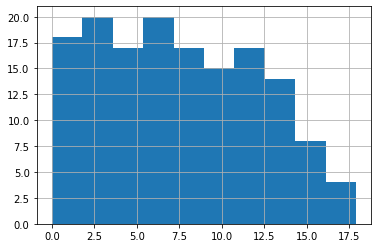

In [22]:
def_df.ptPerMil.hist()

In [23]:
def_df.sort_values('ptPerMil',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
50,Matt Targett,Targett,AVL,7.4,47,1694,0,3,385,11,7.0,84,6.0,NaN,DEF,17.9,1.5,486911,72422
588,Aaron Cresswell,Cresswell,WHU,21.3,55,1890,0,8,453,7,4.8,96,1.0,NaN,DEF,17.5,0.9,1489843,98568
294,Stuart Dallas,Dallas,LEE,13.4,48,1790,4,2,389,6,3.7,82,NaN,NaN,DEF,17.1,0.8,693072,37075
496,Jan Bednarek,Bednarek,SOU,12.3,49,1710,1,1,397,8,2.8,83,NaN,NaN,DEF,16.9,0.6,720869,-20127
377,Rúben Santos Gato Alves Dias,Gato Alves Dias,MCI,18.6,60,1599,0,1,401,12,6.8,91,NaN,NaN,DEF,15.2,1.1,1394182,163496
14,Rob Holding,Holding,ARS,5.7,45,1575,0,1,343,8,5.5,68,NaN,NaN,DEF,15.1,1.2,317321,51568
280,James Justin,Justin,LEI,26.9,51,1890,1,2,381,7,3.4,77,NaN,NaN,DEF,15.1,0.7,1126261,20598
585,Angelo Ogbonna,Ogbonna,WHU,2.8,50,1862,2,0,341,7,2.2,75,NaN,NaN,DEF,15.0,0.4,170314,-5538
54,Ezri Konsa Ngoyo,Konsa Ngoyo,AVL,5.2,46,1485,2,0,295,7,4.0,69,NaN,NaN,DEF,15.0,0.9,280902,-573
495,Kyle Walker-Peters,Walker-Peters,SOU,7.8,47,1620,0,2,354,8,1.8,70,NaN,NaN,DEF,14.9,0.4,-238984,-104052


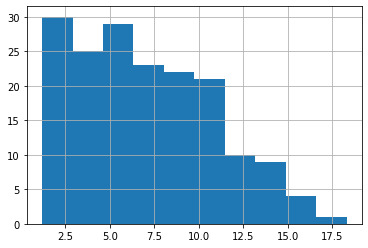

In [24]:
mid_df.ptPerMil.hist()

In [25]:
mid_df.sort_values('ptPerMil',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
601,Tomas Soucek,Soucek,WHU,18.5,53,1890,7,1,333,7,5.0,97,NaN,NaN,MID,18.3,0.9,1063974,19126
297,Jack Harrison,Harrison,LEE,2.2,54,1579,5,4,286,6,6.0,85,3.0,NaN,MID,15.7,1.1,60729,10063
45,Jack Grealish,Grealish,AVL,39.1,77,1707,6,11,457,10,5.5,119,4.0,2.0,MID,15.5,0.7,2049912,105918
629,Pedro Lomba Neto,Lomba Neto,WOL,8.0,58,1711,4,5,351,6,2.0,88,4.0,NaN,MID,15.2,0.3,524749,-63048
22,Bukayo Saka,Saka,ARS,10.6,54,1503,5,3,285,6,6.2,81,6.0,NaN,MID,15.0,1.1,289944,-104320
522,Heung-Min Son,Son,TOT,58.1,98,1706,12,6,458,8,2.8,143,6.0,2.0,MID,14.6,0.3,2112268,-127710
491,James Ward-Prowse,Ward-Prowse,SOU,8.9,61,1800,4,5,412,8,3.5,87,1.0,2.0,MID,14.3,0.6,322352,-39359
355,Ilkay Gündogan,Gündogan,MCI,18.8,58,1125,7,0,320,9,7.8,83,4.0,2.0,MID,14.3,1.3,1426978,47703
179,Wilfried Zaha,Zaha,CRY,15.1,72,1610,9,3,250,4,3.0,101,NaN,3.0,MID,14.0,0.4,242099,22288
598,Jarrod Bowen,Bowen,WHU,2.5,62,1620,5,3,265,6,4.2,85,NaN,NaN,MID,13.7,0.7,44925,-7469


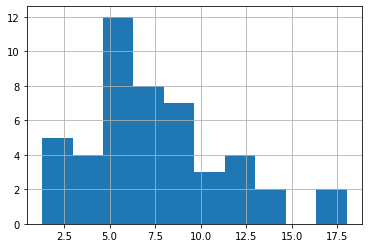

In [26]:
fwd_df.ptPerMil.hist()

In [27]:
fwd_df.sort_values('ptPerMil',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event
296,Patrick Bamford,Bamford,LEE,47.3,66,1695,11,7,388,6,6.0,119,NaN,1.0,FWD,18.0,0.9,2941889,35061
447,Callum Wilson,Wilson,NEW,22.2,67,1687,10,5,345,5,4.3,110,NaN,1.0,FWD,16.4,0.6,951387,338536
63,Ollie Watkins,Watkins,AVL,17.5,63,1710,8,4,273,10,4.0,85,NaN,3.0,FWD,13.5,0.6,1224851,78020
209,Dominic Calvert-Lewin,Calvert-Lewin,EVE,38.7,76,1583,11,4,346,5,1.3,99,NaN,NaN,FWD,13.0,0.2,1816287,18622
520,Harry Kane,Kane,TOT,23.7,111,1654,12,11,512,6,4.5,143,1.0,1.0,FWD,12.9,0.4,358001,-582538
497,Che Adams,Adams,SOU,5.0,59,1532,4,5,241,6,1.2,75,NaN,NaN,FWD,12.7,0.2,33532,-21137
80,Neal Maupay,Maupay,BHA,3.1,61,1386,7,1,233,5,3.2,72,NaN,2.0,FWD,11.8,0.5,47753,-4742
266,Jamie Vardy,Vardy,LEI,13.8,100,1476,11,8,412,6,1.8,116,NaN,1.0,FWD,11.6,0.2,-582785,-66626
454,David McGoldrick,McGoldrick,SHU,2.2,52,1208,5,1,195,5,2.8,59,NaN,NaN,FWD,11.3,0.5,83484,6405
235,Bobby Decordova-Reid,Decordova-Reid,FUL,1.0,53,1259,5,1,237,5,2.4,56,NaN,NaN,FWD,10.6,0.5,59966,4124


# Data by GW

In [28]:
pd.options.display.max_columns = None

In [29]:
url = f'https://fantasy.premierleague.com/api/element-summary/1/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['fixtures', 'history', 'history_past'])

In [30]:
json_fixtures_df = pd.DataFrame(json['fixtures'])
json_history_df = pd.DataFrame(json['history'])
json_history_past_df = pd.DataFrame(json['history_past'])

In [31]:
json_history_past_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,2013/14,37605,100,96,137,2141,5,10,13,23,0,0,0,0,0,0,18,162,0.0,0.0,0.0,0.0
1,2014/15,37605,90,90,103,1857,4,6,9,16,0,0,0,0,0,0,13,511,0.0,0.0,0.0,0.0
2,2015/16,37605,85,92,200,3036,6,19,17,31,0,0,0,4,0,0,30,861,0.0,0.0,0.0,0.0
3,2016/17,37605,95,95,167,2841,8,11,12,30,0,0,0,2,0,0,19,729,834.4,1649.3,734.0,322.0
4,2017/18,37605,95,93,112,2161,4,9,8,36,0,0,0,4,0,0,11,506,640.6,1287.5,555.0,248.6


In [32]:
for x in elements_df.index :
    element_id = elements_df.id[x]
    url = f'https://fantasy.premierleague.com/api/element-summary/{element_id}/'
    r = requests.get(url)
    json = r.json()
    json_history_df = pd.DataFrame(json['history'])
    json_history_past_df = pd.DataFrame(json['history_past'])
    
    if x == 0 :
        all_history_df = json_history_df
        all_history_past_df = json_history_past_df
    else : 
        all_history_df = all_history_df.append(json_history_df)
        all_history_past_df = all_history_past_df.append(json_history_past_df)
all_history_df.head()


,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,1,2,8,0,False,2020-09-12T11:30:00Z,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,70,0,76656,0,0
1,1,9,19,0,True,2020-09-19T19:00:00Z,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,69,-16828,68335,995,17823
2,1,23,11,0,False,2020-09-28T19:00:00Z,3,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,69,-11451,59793,675,12126
3,1,29,15,0,True,2020-10-04T13:00:00Z,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,68,-5324,56403,647,5971
4,1,44,12,0,False,2020-10-17T16:30:00Z,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,68,-4224,53689,616,4840


In [33]:
all_history_df['first_name'] = all_history_df.element.map(elements_df.set_index('id').first_name)
all_history_df['second_name'] = all_history_df.element.map(elements_df.set_index('id').second_name)
all_history_df['element'] = all_history_df.first_name + " " + all_history_df.second_name
all_history_df['opponent_team'] = all_history_df.opponent_team.map(teams_df.set_index('id').name)
all_history_df.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,first_name,second_name
0,Mesut Özil,2,Fulham,0,False,2020-09-12T11:30:00Z,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,70,0,76656,0,0,Mesut,Özil
1,Mesut Özil,9,West Ham,0,True,2020-09-19T19:00:00Z,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,69,-16828,68335,995,17823,Mesut,Özil
2,Mesut Özil,23,Liverpool,0,False,2020-09-28T19:00:00Z,3,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,69,-11451,59793,675,12126,Mesut,Özil
3,Mesut Özil,29,Sheffield Utd,0,True,2020-10-04T13:00:00Z,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,68,-5324,56403,647,5971,Mesut,Özil
4,Mesut Özil,44,Man City,0,False,2020-10-17T16:30:00Z,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,68,-4224,53689,616,4840,Mesut,Özil


In [34]:
#drop all players that have not played 180 minutes
all_history_df = all_history_df[~all_history_df.element.isin(idle_players)]
all_history_df.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,first_name,second_name
0,David Luiz Moreira Marinho,2,Fulham,0,False,2020-09-12T11:30:00Z,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,55,0,69564,0,0,David,Luiz Moreira Marinho
1,David Luiz Moreira Marinho,9,West Ham,1,True,2020-09-19T19:00:00Z,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,0.0,0.0,55,-23455,49797,1738,25193,David,Luiz Moreira Marinho
2,David Luiz Moreira Marinho,23,Liverpool,1,False,2020-09-28T19:00:00Z,3,1,3,90,0,0,0,3,0,0,0,0,0,0,0,11,20.2,3.2,0.0,2.3,55,711,61983,7407,6696,David,Luiz Moreira Marinho
3,David Luiz Moreira Marinho,29,Sheffield Utd,2,True,2020-10-04T13:00:00Z,2,1,4,90,0,0,0,1,0,0,0,0,0,0,0,13,23.0,0.8,0.0,2.4,55,1264,69592,6180,4916,David,Luiz Moreira Marinho
4,David Luiz Moreira Marinho,44,Man City,2,False,2020-10-17T16:30:00Z,1,0,5,90,0,0,0,1,0,0,0,0,0,0,0,12,14.6,3.3,19.0,3.7,55,-1132,73952,5063,6195,David,Luiz Moreira Marinho


In [35]:
all_history_df['pt_vol'] = np.nan
all_history_df['3g_form'] = np.nan
all_history_df['5g_form'] = np.nan
all_history_df['8g_form'] = np.nan
all_history_df['wgt_3g_form'] = np.nan
all_history_df['wgt_5g_form'] = np.nan
all_history_df['wgt_8g_form'] = np.nan
all_history_df['return_rolling'] = np.nan

In [36]:
all_history_df['returned'] = -1

In [37]:
all_history_df.loc[(all_history_df.goals_scored>0) | (all_history_df.assists>0) | (all_history_df.assists>0) | (all_history_df.clean_sheets>0) | (all_history_df.bonus>0) | (all_history_df.penalties_saved>0) | (all_history_df.saves >3),'returned']= 1
all_history_df

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,first_name,second_name,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned
0,David Luiz Moreira Marinho,2,Fulham,0,False,2020-09-12T11:30:00Z,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,55,0,69564,0,0,David,Luiz Moreira Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,David Luiz Moreira Marinho,9,West Ham,1,True,2020-09-19T19:00:00Z,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,0.0,0.0,55,-23455,49797,1738,25193,David,Luiz Moreira Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,David Luiz Moreira Marinho,23,Liverpool,1,False,2020-09-28T19:00:00Z,3,1,3,90,0,0,0,3,0,0,0,0,0,0,0,11,20.2,3.2,0.0,2.3,55,711,61983,7407,6696,David,Luiz Moreira Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,David Luiz Moreira Marinho,29,Sheffield Utd,2,True,2020-10-04T13:00:00Z,2,1,4,90,0,0,0,1,0,0,0,0,0,0,0,13,23.0,0.8,0.0,2.4,55,1264,69592,6180,4916,David,Luiz Moreira Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,David Luiz Moreira Marinho,44,Man City,2,False,2020-10-17T16:30:00Z,1,0,5,90,0,0,0,1,0,0,0,0,0,0,0,12,14.6,3.3,19.0,3.7,55,-1132,73952,5063,6195,David,Luiz Moreira Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Rayan Ait Nouri,159,Brighton,1,False,2021-01-02T17:30:00Z,3,3,17,90,0,0,0,3,0,0,0,0,0,0,0,3,5.6,3.3,0.0,0.9,50,357,12881,1541,1184,Rayan,Ait Nouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
13,Rayan Ait Nouri,176,Everton,6,True,2021-01-12T20:15:00Z,1,2,18,90,0,1,0,2,0,0,0,0,0,0,2,32,26.2,24.3,2.0,5.3,50,541,16499,2518,1977,Rayan,Ait Nouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
14,Rayan Ait Nouri,188,West Brom,1,True,2021-01-16T12:30:00Z,2,3,19,26,0,0,0,0,0,0,0,0,0,0,0,2,0.0,1.2,1.0,0.2,50,2169,15968,3883,1714,Rayan,Ait Nouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
15,Rayan Ait Nouri,194,Chelsea,1,False,2021-01-27T18:00:00Z,0,0,20,45,0,0,0,0,0,0,0,0,0,0,0,4,3.2,0.0,0.0,0.3,50,-2397,13713,555,2952,Rayan,Ait Nouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [38]:
#how many players are left to focus on?
players = list(set(all_history_df.element))
len(players)

396

In [39]:
players.sort()
players[:5]

['Aaron Connolly',
 'Aaron Cresswell',
 'Aaron Ramsdale',
 'Aaron Wan-Bissaka',
 'Abdoulaye Doucouré']

In [40]:
all_history_df[all_history_df.element == players[0]].returned

0    -1
1     1
2    -1
3    -1
4     1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14   -1
15   -1
16    1
17   -1
18   -1
19   -1
20   -1
Name: returned, dtype: int64

In [41]:
#for loop over history of each player and saving some calculations to the overall stats for that player
w3 = pd.DataFrame(list(range(1,4)))/sum(range(1,4))
w5 = pd.DataFrame(list(range(1,6)))/sum(range(1,6))
w8 = pd.DataFrame(list(range(1,9)))/sum(range(1,9))

for p in players:
    p_df = all_history_df[all_history_df.element == p]
    p_df.pt_vol = p_df.total_points.expanding(3).std()
    p_df['3g_form'] = p_df.total_points.rolling(3).mean()
    p_df['5g_form'] = p_df.total_points.rolling(5).mean()
    p_df['8g_form'] = p_df.total_points.rolling(8).mean()
    p_df.return_rolling = p_df.returned.rolling(5).sum()
    p_df.wgt_3g_form = p_df.total_points.rolling(3).apply(lambda x: np.dot(x,w3))
    p_df.wgt_5g_form = p_df.total_points.rolling(5).apply(lambda x: np.dot(x,w5))
    p_df.wgt_8g_form = p_df.total_points.rolling(8).apply(lambda x: np.dot(x,w8))
    returns = p_df.returned
    #print(p)
    for i in range(2,p_df.shape[0]):
       # print(returns[i])
        if np.sign(returns[i]) != np.sign(returns[i-1]):
            continue
        returns[i] = returns[i-1] + np.sign(returns[i-1])
    p_df.returned = returns
    all_history_df[all_history_df.element == p] = p_df

In [42]:
all_history_df[all_history_df['round']==21]

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,first_name,second_name,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned
20,David Luiz Moreira Marinho,199,Man Utd,6,True,2021-01-30T17:30:00Z,0,0,21,90,0,0,1,0,0,0,0,0,0,0,0,26,13.8,0.8,30.0,4.5,54,-150,60191,900,1050,David,Luiz Moreira Marinho,1.957890,4.666667,3.8,2.500,4.666667,4.400000,3.444444,1.0,1
20,Pierre-Emerick Aubameyang,199,Man Utd,0,True,2021-01-30T17:30:00Z,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,113,-22681,524991,1164,23845,Pierre-Emerick,Aubameyang,3.787825,5.000000,4.2,3.000,2.500000,3.600000,3.500000,1.0,-2
20,Cédric Soares,199,Man Utd,5,True,2021-01-30T17:30:00Z,0,0,21,90,0,0,1,0,0,0,0,1,0,0,0,18,8.6,10.8,1.0,2.0,46,1473,16187,2215,742,Cédric,Soares,2.783455,6.333333,3.8,2.375,5.166667,4.600000,3.500000,-1.0,1
20,Alexandre Lacazette,199,Man Utd,2,True,2021-01-30T17:30:00Z,0,0,21,90,0,0,1,0,0,0,0,0,0,0,0,2,0.0,1.1,12.0,1.3,84,196816,693962,225624,28808,Alexandre,Lacazette,3.762598,5.000000,5.8,5.625,5.000000,5.066667,5.583333,5.0,7
20,Bernd Leno,199,Man Utd,7,True,2021-01-30T17:30:00Z,0,0,21,90,0,0,1,0,0,0,0,0,0,3,0,25,26.2,0.0,0.0,2.6,50,-5667,719531,20995,26662,Bernd,Leno,2.718543,5.333333,5.8,5.500,5.500000,5.600000,5.722222,5.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Fernando Marçal,202,Crystal Palace,0,False,2021-01-30T15:00:00Z,1,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,47,-216,7474,17,233,Fernando,Marçal,1.220851,0.000000,0.0,0.125,0.000000,0.000000,0.055556,-5.0,-20
20,Vitor Ferreira,202,Crystal Palace,1,False,2021-01-30T15:00:00Z,1,0,21,22,0,0,0,0,0,0,0,0,0,0,0,2,0.0,1.7,0.0,0.1,48,-100,2463,16,116,Vitor,Ferreira,0.956183,0.333333,0.8,0.875,0.500000,0.600000,0.750000,-5.0,-8
18,Ki-Jana Hoever,202,Crystal Palace,2,False,2021-01-30T15:00:00Z,1,0,21,62,0,0,0,1,0,0,0,0,0,0,0,10,4.0,1.8,0.0,0.6,44,-19,3582,103,122,Ki-Jana,Hoever,0.683986,1.000000,0.6,0.625,1.333333,0.933333,0.805556,-5.0,-18
18,Nélson Cabral Semedo,202,Crystal Palace,2,False,2021-01-30T15:00:00Z,1,0,21,90,0,0,0,1,0,0,0,0,0,0,0,14,19.6,13.3,9.0,4.2,53,-975,151752,3950,4925,Nélson,Cabral Semedo,2.495610,3.000000,2.4,1.750,3.166667,2.666667,2.194444,-1.0,-1


In [43]:
merge_df = all_history_df[all_history_df['round']==max(all_history_df['round'])].drop(columns = all_history_df.columns[1:33])

In [44]:
merge_df

,element,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned
20,David Luiz Moreira Marinho,1.957890,4.666667,3.8,2.500,4.666667,4.400000,3.444444,1.0,1
20,Pierre-Emerick Aubameyang,3.787825,5.000000,4.2,3.000,2.500000,3.600000,3.500000,1.0,-2
20,Cédric Soares,2.783455,6.333333,3.8,2.375,5.166667,4.600000,3.500000,-1.0,1
20,Alexandre Lacazette,3.762598,5.000000,5.8,5.625,5.000000,5.066667,5.583333,5.0,7
20,Bernd Leno,2.718543,5.333333,5.8,5.500,5.500000,5.600000,5.722222,5.0,7
...,...,...,...,...,...,...,...,...,...,...
20,Fernando Marçal,1.220851,0.000000,0.0,0.125,0.000000,0.000000,0.055556,-5.0,-20
20,Vitor Ferreira,0.956183,0.333333,0.8,0.875,0.500000,0.600000,0.750000,-5.0,-8
18,Ki-Jana Hoever,0.683986,1.000000,0.6,0.625,1.333333,0.933333,0.805556,-5.0,-18
18,Nélson Cabral Semedo,2.495610,3.000000,2.4,1.750,3.166667,2.666667,2.194444,-1.0,-1


In [48]:
slim_elements_df = slim_elements_df.join(merge_df.set_index('element'),on = 'first_name')

In [49]:
slim_elements_df['3v5_trend'] = slim_elements_df['3g_form'] - slim_elements_df['5g_form']
slim_elements_df['3v8_trend'] = slim_elements_df['3g_form'] - slim_elements_df['8g_form']
slim_elements_df['wgt_3v5_trend'] = slim_elements_df['wgt_3g_form'] - slim_elements_df['wgt_5g_form']
slim_elements_df['wgt_3v8_trend'] = slim_elements_df['wgt_3g_form'] - slim_elements_df['wgt_8g_form']

In [50]:
slim_elements_df.head()

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
2,David Luiz Moreira Marinho,Luiz Moreira Marinho,ARS,0.8,54,839,0,0,143,3,4.8,28,4.0,NaN,DEF,5.2,0.9,-46910,2635,1.957890,4.666667,3.8,2.500,4.666667,4.400000,3.444444,1.0,1,0.866667,2.166667,0.266667,1.222222
3,Pierre-Emerick Aubameyang,Aubameyang,ARS,6.5,113,1514,5,1,202,7,4.5,71,NaN,1.0,MID,6.3,0.4,-2695576,-7976,3.787825,5.000000,4.2,3.000,2.500000,3.600000,3.500000,1.0,-2,0.800000,2.000000,-1.100000,-1.000000
4,Cédric Soares,Soares,ARS,0.3,46,275,0,1,71,2,4.8,20,NaN,NaN,DEF,4.3,1.0,-24325,3390,2.783455,6.333333,3.8,2.375,5.166667,4.600000,3.500000,-1.0,1,2.533333,3.958333,0.566667,1.666667
5,Alexandre Lacazette,Lacazette,ARS,8.1,84,1211,8,1,265,6,4.2,75,NaN,3.0,FWD,8.9,0.5,285489,-44206,3.762598,5.000000,5.8,5.625,5.000000,5.066667,5.583333,5.0,7,-0.800000,-0.625000,-0.066667,-0.583333
7,Bernd Leno,Leno,ARS,9.3,50,1890,0,0,407,8,5.5,89,NaN,NaN,GKP,17.8,1.1,54942,14992,2.718543,5.333333,5.8,5.500,5.500000,5.600000,5.722222,5.0,7,-0.466667,-0.166667,-0.100000,-0.222222


In [52]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'FWD']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'MID']
def_df = slim_elements_df.loc[slim_elements_df.position == 'DEF']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'GKP']

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
97,Robert Sánchez,Sánchez,BHA,1.4,44,900,0,0,193,4,6.0,40,NaN,NaN,GKP,9.1,1.4,104338,6464,3.199702,7.000000,5.0,3.750,7.166667,6.133333,4.916667,3.0,4,2.000000,3.250000,1.033333,2.250000
612,Rui Pedro dos Santos Patrício,dos Santos Patrício,WOL,4.6,54,1890,0,0,324,5,3.2,67,NaN,NaN,GKP,12.4,0.6,-138996,-6430,2.786020,4.000000,2.8,2.250,4.166667,3.466667,2.833333,-3.0,-1,1.200000,1.750000,0.700000,1.333333
35,Emiliano Martínez,Martínez,AVL,33.4,51,1710,0,0,444,10,5.0,103,NaN,NaN,GKP,20.2,1.0,1910165,48241,3.863156,5.666667,4.6,5.250,6.333333,5.400000,5.138889,3.0,1,1.066667,0.416667,0.933333,1.194444
120,Nick Pope,Pope,BUR,10.9,54,1710,0,0,418,7,4.6,98,NaN,NaN,GKP,18.1,0.9,-336419,-3464,3.972272,5.666667,4.6,4.250,4.333333,4.533333,4.527778,3.0,3,1.066667,1.416667,-0.200000,-0.194444
250,Alphonse Areola,Areola,FUL,3.2,45,1710,0,0,354,4,3.8,69,NaN,NaN,GKP,15.3,0.8,123995,-3442,2.723678,4.333333,3.8,4.875,4.166667,4.000000,4.333333,1.0,-1,0.533333,-0.541667,0.166667,-0.166667


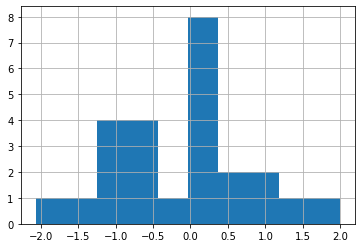

In [62]:
goal_df['3v5_trend'].hist()
goal_df.sort_values('3v5_trend',ascending=False).head(5)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
97,Robert Sánchez,Sánchez,BHA,1.4,44,900,0,0,193,4,6.0,40,NaN,NaN,GKP,9.1,1.4,104338,6464,3.199702,7.000000,5.0,3.750,7.166667,6.133333,4.916667,3.0,4,2.000000,3.250000,1.033333,2.250000
612,Rui Pedro dos Santos Patrício,dos Santos Patrício,WOL,4.6,54,1890,0,0,324,5,3.2,67,NaN,NaN,GKP,12.4,0.6,-138996,-6430,2.786020,4.000000,2.8,2.250,4.166667,3.466667,2.833333,-3.0,-1,1.200000,1.750000,0.700000,1.333333
120,Nick Pope,Pope,BUR,10.9,54,1710,0,0,418,7,4.6,98,NaN,NaN,GKP,18.1,0.9,-336419,-3464,3.972272,5.666667,4.6,4.250,4.333333,4.533333,4.527778,3.0,3,1.066667,1.416667,-0.200000,-0.194444
362,Ederson Santana de Moraes,Santana de Moraes,MCI,8.2,60,1710,0,0,366,12,5.2,88,NaN,NaN,GKP,14.7,0.9,176448,20611,2.392972,6.333333,6.2,5.375,6.166667,6.200000,5.666667,5.0,5,0.133333,0.958333,-0.033333,0.500000
159,Edouard Mendy,Mendy,CHE,6.9,51,1530,0,0,321,9,4.4,71,NaN,NaN,GKP,13.9,0.9,391760,-5330,2.423086,4.666667,4.4,4.000,5.333333,4.933333,4.333333,3.0,4,0.266667,0.666667,0.400000,1.000000


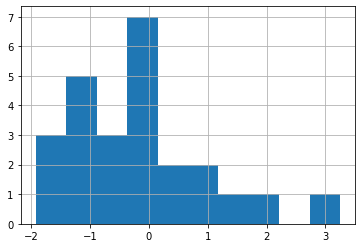

In [64]:
goal_df['3v8_trend'].hist()
goal_df.sort_values('3v8_trend',ascending=False).head(5)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
97,Robert Sánchez,Sánchez,BHA,1.4,44,900,0,0,193,4,6.0,40,NaN,NaN,GKP,9.1,1.4,104338,6464,3.199702,7.000000,5.0,3.75,7.166667,6.133333,4.916667,3.0,4,2.000000,3.250000,1.033333,2.250000
35,Emiliano Martínez,Martínez,AVL,33.4,51,1710,0,0,444,10,5.0,103,NaN,NaN,GKP,20.2,1.0,1910165,48241,3.863156,5.666667,4.6,5.25,6.333333,5.400000,5.138889,3.0,1,1.066667,0.416667,0.933333,1.194444
612,Rui Pedro dos Santos Patrício,dos Santos Patrício,WOL,4.6,54,1890,0,0,324,5,3.2,67,NaN,NaN,GKP,12.4,0.6,-138996,-6430,2.786020,4.000000,2.8,2.25,4.166667,3.466667,2.833333,-3.0,-1,1.200000,1.750000,0.700000,1.333333
424,Karl Darlow,Darlow,NEW,2.0,50,1890,0,0,397,4,2.3,74,NaN,NaN,GKP,14.8,0.5,87230,-719,2.676174,3.000000,2.6,3.00,3.666667,3.066667,2.944444,-3.0,1,0.400000,0.000000,0.600000,0.722222
159,Edouard Mendy,Mendy,CHE,6.9,51,1530,0,0,321,9,4.4,71,NaN,NaN,GKP,13.9,0.9,391760,-5330,2.423086,4.666667,4.4,4.00,5.333333,4.933333,4.333333,3.0,4,0.266667,0.666667,0.400000,1.000000


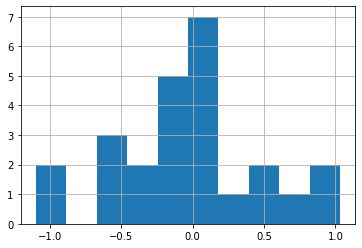

In [65]:
goal_df['wgt_3v5_trend'].hist()
goal_df.sort_values('wgt_3v5_trend',ascending=False).head(5)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
97,Robert Sánchez,Sánchez,BHA,1.4,44,900,0,0,193,4,6.0,40,NaN,NaN,GKP,9.1,1.4,104338,6464,3.199702,7.000000,5.0,3.75,7.166667,6.133333,4.916667,3.0,4,2.000000,3.250000,1.033333,2.250000
612,Rui Pedro dos Santos Patrício,dos Santos Patrício,WOL,4.6,54,1890,0,0,324,5,3.2,67,NaN,NaN,GKP,12.4,0.6,-138996,-6430,2.786020,4.000000,2.8,2.25,4.166667,3.466667,2.833333,-3.0,-1,1.200000,1.750000,0.700000,1.333333
35,Emiliano Martínez,Martínez,AVL,33.4,51,1710,0,0,444,10,5.0,103,NaN,NaN,GKP,20.2,1.0,1910165,48241,3.863156,5.666667,4.6,5.25,6.333333,5.400000,5.138889,3.0,1,1.066667,0.416667,0.933333,1.194444
159,Edouard Mendy,Mendy,CHE,6.9,51,1530,0,0,321,9,4.4,71,NaN,NaN,GKP,13.9,0.9,391760,-5330,2.423086,4.666667,4.4,4.00,5.333333,4.933333,4.333333,3.0,4,0.266667,0.666667,0.400000,1.000000
424,Karl Darlow,Darlow,NEW,2.0,50,1890,0,0,397,4,2.3,74,NaN,NaN,GKP,14.8,0.5,87230,-719,2.676174,3.000000,2.6,3.00,3.666667,3.066667,2.944444,-3.0,1,0.400000,0.000000,0.600000,0.722222


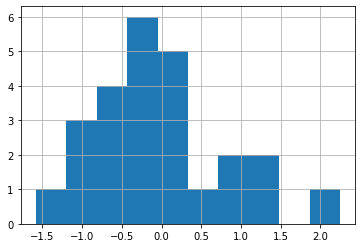

In [66]:
goal_df['wgt_3v8_trend'].hist()
goal_df.sort_values('wgt_3v8_trend',ascending=False).head(5)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
614,Willy Boly,Boly,WOL,1.5,54,1350,1,1,278,5,5.0,56,NaN,NaN,DEF,10.4,0.9,-82416,-23,3.351617,6.666667,4.0,2.500,5.000000,4.666667,3.611111,-1.0,-1,2.666667,4.166667,0.333333,1.388889
4,Cédric Soares,Soares,ARS,0.3,46,275,0,1,71,2,4.8,20,NaN,NaN,DEF,4.3,1.0,-24325,3390,2.783455,6.333333,3.8,2.375,5.166667,4.600000,3.500000,-1.0,1,2.533333,3.958333,0.566667,1.666667
79,Joël Veltman,Veltman,BHA,0.5,43,1200,0,0,228,4,5.5,43,NaN,NaN,DEF,10.0,1.3,5259,1206,2.819152,7.000000,4.6,3.250,6.833333,5.733333,4.500000,1.0,3,2.400000,3.750000,1.100000,2.333333
85,Ben White,White,BHA,1.2,44,1759,0,0,316,6,5.5,55,NaN,NaN,DEF,12.5,1.2,-33098,2289,2.519448,6.666667,4.6,3.250,6.666667,5.666667,4.388889,1.0,3,2.066667,3.416667,1.000000,2.277778
62,Matthew Cash,Cash,AVL,1.3,50,1582,0,2,349,9,4.8,72,NaN,NaN,DEF,14.4,1.0,61859,8938,3.047384,6.000000,4.0,4.875,6.166667,5.066667,4.861111,-1.0,1,2.000000,1.125000,1.100000,1.305556


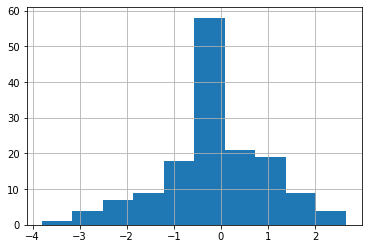

In [67]:
def_df['3v5_trend'].hist()
def_df.sort_values('3v5_trend',ascending=False).head(5)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
614,Willy Boly,Boly,WOL,1.5,54,1350,1,1,278,5,5.0,56,NaN,NaN,DEF,10.4,0.9,-82416,-23,3.351617,6.666667,4.0,2.500,5.000000,4.666667,3.611111,-1.0,-1,2.666667,4.166667,0.333333,1.388889
4,Cédric Soares,Soares,ARS,0.3,46,275,0,1,71,2,4.8,20,NaN,NaN,DEF,4.3,1.0,-24325,3390,2.783455,6.333333,3.8,2.375,5.166667,4.600000,3.500000,-1.0,1,2.533333,3.958333,0.566667,1.666667
79,Joël Veltman,Veltman,BHA,0.5,43,1200,0,0,228,4,5.5,43,NaN,NaN,DEF,10.0,1.3,5259,1206,2.819152,7.000000,4.6,3.250,6.833333,5.733333,4.500000,1.0,3,2.400000,3.750000,1.100000,2.333333
85,Ben White,White,BHA,1.2,44,1759,0,0,316,6,5.5,55,NaN,NaN,DEF,12.5,1.2,-33098,2289,2.519448,6.666667,4.6,3.250,6.666667,5.666667,4.388889,1.0,3,2.066667,3.416667,1.000000,2.277778
138,Marcos Alonso,Alonso,CHE,1.7,56,315,1,0,67,1,2.8,16,5.0,NaN,DEF,2.9,0.5,-134188,22165,3.080662,4.666667,2.8,1.750,7.000000,4.666667,3.111111,-3.0,1,1.866667,2.916667,2.333333,3.888889


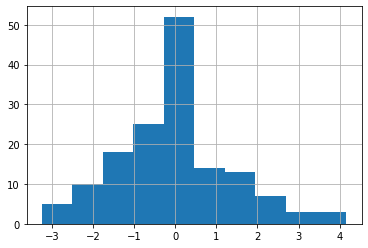

In [68]:
def_df['3v8_trend'].hist()
def_df.sort_values('3v8_trend',ascending=False).head(5)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
69,Pascal Groß,Groß,BHA,0.3,58,983,2,3,242,4,3.8,58,3.0,1.0,MID,10.0,0.7,584,-523,3.064388,5.000000,3.0,2.250,6.000000,4.400000,3.305556,1.0,3,2.000000,2.750000,1.600000,2.694444
124,Dwight McNeil,McNeil,BUR,0.3,57,1506,1,2,219,7,4.0,54,6.0,NaN,MID,9.5,0.7,-40768,-23,2.696977,6.000000,4.0,2.875,5.833333,4.933333,3.805556,-1.0,-1,2.000000,3.125000,0.900000,2.027778
438,Miguel Almirón,Almirón,NEW,0.4,56,1185,2,1,201,3,3.0,51,NaN,NaN,MID,9.1,0.5,-46484,194,2.399405,4.666667,3.2,2.625,4.833333,4.066667,3.305556,-1.0,2,1.466667,2.041667,0.766667,1.527778
332,Mohamed Salah,Salah,LIV,42.9,126,1651,15,4,442,5,4.6,146,2.0,2.0,MID,11.6,0.4,701676,369853,5.669887,6.000000,4.6,5.500,8.333333,6.266667,5.333333,-1.0,1,1.400000,0.500000,2.066667,3.000000
355,Ilkay Gündogan,Gündogan,MCI,18.8,58,1125,7,0,320,9,7.8,83,4.0,2.0,MID,14.3,1.3,1426978,47703,4.428080,9.000000,7.6,7.625,7.833333,8.000000,7.944444,5.0,9,1.400000,1.375000,-0.166667,-0.111111
365,Bernardo Mota Veiga de Carvalho e Silva,Veiga de Carvalho e Silva,MCI,1.0,74,1030,1,1,185,7,3.5,39,NaN,NaN,MID,5.3,0.5,5260,-1665,2.139233,5.333333,4.0,3.375,4.333333,4.200000,3.750000,3.0,3,1.333333,1.958333,0.133333,0.583333
528,Pierre-Emile Højbjerg,Højbjerg,TOT,0.9,49,1800,1,2,289,6,3.8,53,NaN,NaN,MID,10.8,0.8,-22813,145,1.496487,4.666667,3.4,2.750,4.166667,3.800000,3.305556,1.0,-1,1.266667,1.916667,0.366667,0.861111
33,Thomas Partey,Partey,ARS,0.3,49,531,0,1,99,3,3.0,19,NaN,NaN,MID,3.9,0.6,9903,629,1.653872,3.666667,2.4,1.500,3.166667,2.866667,2.194444,-1.0,1,1.266667,2.166667,0.300000,0.972222
217,James Rodríguez,Rodríguez,EVE,9.0,77,1126,4,3,281,1,3.7,61,1.0,NaN,MID,7.9,0.5,-313455,-8865,4.661651,3.666667,2.4,1.500,3.500000,3.000000,2.250000,-3.0,-1,1.266667,2.166667,0.500000,1.250000
329,Sadio Mané,Mané,LIV,7.9,119,1599,7,7,297,5,4.4,103,NaN,3.0,MID,8.7,0.4,-382362,-46105,4.471071,5.666667,4.4,5.375,5.333333,4.933333,4.888889,-1.0,-1,1.266667,0.291667,0.400000,0.444444


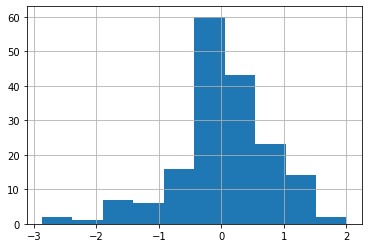

In [74]:
mid_df['3v5_trend'].hist()
mid_df.sort_values('3v5_trend',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
124,Dwight McNeil,McNeil,BUR,0.3,57,1506,1,2,219,7,4.0,54,6.0,NaN,MID,9.5,0.7,-40768,-23,2.696977,6.000000,4.0,2.875,5.833333,4.933333,3.805556,-1.0,-1,2.000000,3.125000,0.900000,2.027778
69,Pascal Groß,Groß,BHA,0.3,58,983,2,3,242,4,3.8,58,3.0,1.0,MID,10.0,0.7,584,-523,3.064388,5.000000,3.0,2.250,6.000000,4.400000,3.305556,1.0,3,2.000000,2.750000,1.600000,2.694444
61,Ross Barkley,Barkley,AVL,0.9,59,812,3,1,160,5,4.0,48,2.0,NaN,MID,8.1,0.7,5998,4678,3.250911,4.333333,3.2,2.000,5.166667,4.200000,3.083333,1.0,1,1.133333,2.333333,0.966667,2.083333
570,Matheus Pereira,Pereira,WBA,1.9,56,1272,5,4,278,2,9.8,73,1.0,NaN,MID,13.0,1.8,-68379,59505,4.501323,8.000000,8.2,5.750,8.666667,8.800000,7.388889,1.0,1,-0.200000,2.250000,-0.133333,1.277778
217,James Rodríguez,Rodríguez,EVE,9.0,77,1126,4,3,281,1,3.7,61,1.0,NaN,MID,7.9,0.5,-313455,-8865,4.661651,3.666667,2.4,1.500,3.500000,3.000000,2.250000,-3.0,-1,1.266667,2.166667,0.500000,1.250000
33,Thomas Partey,Partey,ARS,0.3,49,531,0,1,99,3,3.0,19,NaN,NaN,MID,3.9,0.6,9903,629,1.653872,3.666667,2.4,1.500,3.166667,2.866667,2.194444,-1.0,1,1.266667,2.166667,0.300000,0.972222
359,Riyad Mahrez,Mahrez,MCI,3.6,81,942,5,2,242,7,2.8,70,3.0,4.0,MID,8.6,0.3,68552,-5740,5.385165,4.333333,3.2,2.250,4.166667,3.600000,2.944444,-1.0,-1,1.133333,2.083333,0.566667,1.222222
438,Miguel Almirón,Almirón,NEW,0.4,56,1185,2,1,201,3,3.0,51,NaN,NaN,MID,9.1,0.5,-46484,194,2.399405,4.666667,3.2,2.625,4.833333,4.066667,3.305556,-1.0,2,1.466667,2.041667,0.766667,1.527778
3,Pierre-Emerick Aubameyang,Aubameyang,ARS,6.5,113,1514,5,1,202,7,4.5,71,NaN,1.0,MID,6.3,0.4,-2695576,-7976,3.787825,5.000000,4.2,3.000,2.500000,3.600000,3.500000,1.0,-2,0.800000,2.000000,-1.100000,-1.000000
456,John Fleck,Fleck,SHU,0.1,56,1144,0,3,174,1,4.0,37,2.0,NaN,MID,6.6,0.7,-28812,491,1.757975,4.333333,3.4,2.375,3.666667,3.666667,3.055556,1.0,-1,0.933333,1.958333,0.000000,0.611111


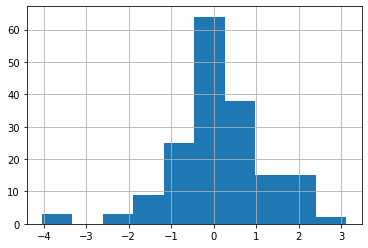

In [75]:
mid_df['3v8_trend'].hist()
mid_df.sort_values('3v8_trend',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
447,Callum Wilson,Wilson,NEW,22.2,67,1687,10,5,345,5,4.3,110,NaN,1.0,FWD,16.4,0.6,951387,338536,4.763452,6.666667,4.8,3.500,8.500000,6.466667,4.972222,-1.0,2,1.866667,3.166667,2.033333,3.527778
366,Gabriel Fernando de Jesus,de Jesus,MCI,3.3,92,894,3,2,146,5,2.8,45,NaN,5.0,FWD,4.9,0.3,97060,64781,2.899637,4.666667,3.4,2.125,5.500000,4.400000,3.250000,1.0,1,1.266667,2.541667,1.100000,2.250000
162,Michy Batshuayi,Batshuayi,CRY,0.6,57,535,1,2,73,2,2.2,29,NaN,NaN,FWD,5.1,0.4,-111014,535,1.802115,3.000000,1.8,1.375,3.166667,2.466667,1.861111,-1.0,2,1.200000,1.625000,0.700000,1.305556
238,Aleksandar Mitrović,Mitrović,FUL,3.7,55,896,2,3,122,1,1.8,43,2.0,2.0,FWD,7.8,0.3,-1306754,3005,3.150188,3.000000,1.8,1.625,4.000000,2.800000,2.138889,-3.0,1,1.200000,1.375000,1.200000,1.861111
63,Ollie Watkins,Watkins,AVL,17.5,63,1710,8,4,273,10,4.0,85,NaN,3.0,FWD,13.5,0.6,1224851,78020,4.925765,4.666667,3.6,4.125,4.000000,3.866667,3.944444,1.0,3,1.066667,0.541667,0.133333,0.055556
178,Jordan Ayew,Ayew,CRY,1.5,56,958,1,3,126,3,3.0,42,NaN,4.0,FWD,7.5,0.5,-338916,6087,2.000000,3.666667,2.6,2.000,4.166667,3.333333,2.611111,-1.0,2,1.066667,1.666667,0.833333,1.555556
327,Roberto Firmino,Firmino,LIV,8.0,94,1617,6,4,347,6,3.2,84,NaN,4.0,FWD,8.9,0.3,254123,90885,3.714835,4.000000,3.2,4.500,4.500000,3.800000,3.638889,1.0,2,0.800000,-0.500000,0.700000,0.861111
115,Chris Wood,Wood,BUR,1.4,62,1680,4,0,146,7,3.2,63,NaN,1.0,FWD,10.2,0.5,-59020,-10526,2.412140,4.000000,3.2,3.625,4.000000,3.600000,3.361111,-1.0,-1,0.800000,0.375000,0.400000,0.638889
415,Edinson Cavani,Cavani,MUN,4.4,79,619,4,2,150,3,2.6,43,NaN,NaN,FWD,5.4,0.3,306236,17067,3.680455,3.333333,2.6,2.375,2.500000,2.600000,2.388889,1.0,1,0.733333,0.958333,-0.100000,0.111111
454,David McGoldrick,McGoldrick,SHU,2.2,52,1208,5,1,195,5,2.8,59,NaN,NaN,FWD,11.3,0.5,83484,6405,3.187774,3.333333,2.6,2.625,2.333333,2.533333,2.527778,-1.0,-2,0.733333,0.708333,-0.200000,-0.194444


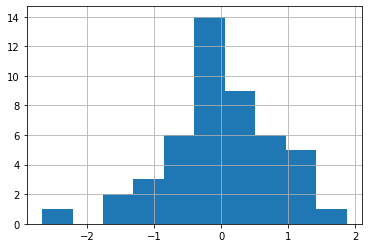

In [76]:
fwd_df['3v5_trend'].hist()
fwd_df.sort_values('3v5_trend',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
447,Callum Wilson,Wilson,NEW,22.2,67,1687,10,5,345,5,4.3,110,NaN,1.0,FWD,16.4,0.6,951387,338536,4.763452,6.666667,4.8,3.500,8.500000,6.466667,4.972222,-1.0,2,1.866667,3.166667,2.033333,3.527778
366,Gabriel Fernando de Jesus,de Jesus,MCI,3.3,92,894,3,2,146,5,2.8,45,NaN,5.0,FWD,4.9,0.3,97060,64781,2.899637,4.666667,3.4,2.125,5.500000,4.400000,3.250000,1.0,1,1.266667,2.541667,1.100000,2.250000
590,Michail Antonio,Antonio,WHU,18.4,65,903,5,1,163,3,6.2,55,NaN,2.0,FWD,8.5,1.0,729314,141034,3.338805,5.333333,5.2,3.375,4.166667,5.066667,4.361111,1.0,-1,0.133333,1.958333,-0.900000,-0.194444
178,Jordan Ayew,Ayew,CRY,1.5,56,958,1,3,126,3,3.0,42,NaN,4.0,FWD,7.5,0.5,-338916,6087,2.000000,3.666667,2.6,2.000,4.166667,3.333333,2.611111,-1.0,2,1.066667,1.666667,0.833333,1.555556
162,Michy Batshuayi,Batshuayi,CRY,0.6,57,535,1,2,73,2,2.2,29,NaN,NaN,FWD,5.1,0.4,-111014,535,1.802115,3.000000,1.8,1.375,3.166667,2.466667,1.861111,-1.0,2,1.200000,1.625000,0.700000,1.305556
238,Aleksandar Mitrović,Mitrović,FUL,3.7,55,896,2,3,122,1,1.8,43,2.0,2.0,FWD,7.8,0.3,-1306754,3005,3.150188,3.000000,1.8,1.625,4.000000,2.800000,2.138889,-3.0,1,1.200000,1.375000,1.200000,1.861111
415,Edinson Cavani,Cavani,MUN,4.4,79,619,4,2,150,3,2.6,43,NaN,NaN,FWD,5.4,0.3,306236,17067,3.680455,3.333333,2.6,2.375,2.500000,2.600000,2.388889,1.0,1,0.733333,0.958333,-0.100000,0.111111
235,Bobby Decordova-Reid,Decordova-Reid,FUL,1.0,53,1259,5,1,237,5,2.4,56,NaN,NaN,FWD,10.6,0.5,59966,4124,2.525658,3.000000,2.4,2.125,4.166667,3.133333,2.555556,-1.0,2,0.600000,0.875000,1.033333,1.611111
454,David McGoldrick,McGoldrick,SHU,2.2,52,1208,5,1,195,5,2.8,59,NaN,NaN,FWD,11.3,0.5,83484,6405,3.187774,3.333333,2.6,2.625,2.333333,2.533333,2.527778,-1.0,-2,0.733333,0.708333,-0.200000,-0.194444
63,Ollie Watkins,Watkins,AVL,17.5,63,1710,8,4,273,10,4.0,85,NaN,3.0,FWD,13.5,0.6,1224851,78020,4.925765,4.666667,3.6,4.125,4.000000,3.866667,3.944444,1.0,3,1.066667,0.541667,0.133333,0.055556


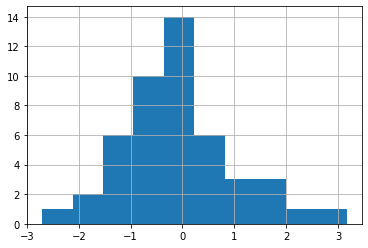

In [77]:
fwd_df['3v8_trend'].hist()
fwd_df.sort_values('3v8_trend',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
5,Alexandre Lacazette,Lacazette,ARS,8.1,84,1211,8,1,265,6,4.2,75,NaN,3.0,FWD,8.9,0.5,285489,-44206,3.762598,5.000000,5.8,5.625,5.000000,5.066667,5.583333,5.0,7,-0.800000,-0.625000,-0.066667,-0.583333
63,Ollie Watkins,Watkins,AVL,17.5,63,1710,8,4,273,10,4.0,85,NaN,3.0,FWD,13.5,0.6,1224851,78020,4.925765,4.666667,3.6,4.125,4.000000,3.866667,3.944444,1.0,3,1.066667,0.541667,0.133333,0.055556
80,Neal Maupay,Maupay,BHA,3.1,61,1386,7,1,233,5,3.2,72,NaN,2.0,FWD,11.8,0.5,47753,-4742,4.032015,4.000000,4.0,3.750,2.666667,3.266667,3.555556,3.0,3,0.000000,0.250000,-0.600000,-0.888889
178,Jordan Ayew,Ayew,CRY,1.5,56,958,1,3,126,3,3.0,42,NaN,4.0,FWD,7.5,0.5,-338916,6087,2.000000,3.666667,2.6,2.000,4.166667,3.333333,2.611111,-1.0,2,1.066667,1.666667,0.833333,1.555556
447,Callum Wilson,Wilson,NEW,22.2,67,1687,10,5,345,5,4.3,110,NaN,1.0,FWD,16.4,0.6,951387,338536,4.763452,6.666667,4.8,3.500,8.500000,6.466667,4.972222,-1.0,2,1.866667,3.166667,2.033333,3.527778
327,Roberto Firmino,Firmino,LIV,8.0,94,1617,6,4,347,6,3.2,84,NaN,4.0,FWD,8.9,0.3,254123,90885,3.714835,4.000000,3.2,4.500,4.500000,3.800000,3.638889,1.0,2,0.800000,-0.500000,0.700000,0.861111
235,Bobby Decordova-Reid,Decordova-Reid,FUL,1.0,53,1259,5,1,237,5,2.4,56,NaN,NaN,FWD,10.6,0.5,59966,4124,2.525658,3.000000,2.4,2.125,4.166667,3.133333,2.555556,-1.0,2,0.600000,0.875000,1.033333,1.611111
162,Michy Batshuayi,Batshuayi,CRY,0.6,57,535,1,2,73,2,2.2,29,NaN,NaN,FWD,5.1,0.4,-111014,535,1.802115,3.000000,1.8,1.375,3.166667,2.466667,1.861111,-1.0,2,1.200000,1.625000,0.700000,1.305556
415,Edinson Cavani,Cavani,MUN,4.4,79,619,4,2,150,3,2.6,43,NaN,NaN,FWD,5.4,0.3,306236,17067,3.680455,3.333333,2.6,2.375,2.500000,2.600000,2.388889,1.0,1,0.733333,0.958333,-0.100000,0.111111
366,Gabriel Fernando de Jesus,de Jesus,MCI,3.3,92,894,3,2,146,5,2.8,45,NaN,5.0,FWD,4.9,0.3,97060,64781,2.899637,4.666667,3.4,2.125,5.500000,4.400000,3.250000,1.0,1,1.266667,2.541667,1.100000,2.250000


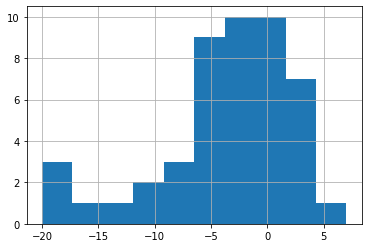

In [78]:
fwd_df['returned'].hist()
fwd_df.sort_values('returned',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
5,Alexandre Lacazette,Lacazette,ARS,8.1,84,1211,8,1,265,6,4.2,75,NaN,3.0,FWD,8.9,0.5,285489,-44206,3.762598,5.000000,5.8,5.625,5.000000,5.066667,5.583333,5.0,7,-0.800000,-0.625000,-0.066667,-0.583333
80,Neal Maupay,Maupay,BHA,3.1,61,1386,7,1,233,5,3.2,72,NaN,2.0,FWD,11.8,0.5,47753,-4742,4.032015,4.000000,4.0,3.750,2.666667,3.266667,3.555556,3.0,3,0.000000,0.250000,-0.600000,-0.888889
63,Ollie Watkins,Watkins,AVL,17.5,63,1710,8,4,273,10,4.0,85,NaN,3.0,FWD,13.5,0.6,1224851,78020,4.925765,4.666667,3.6,4.125,4.000000,3.866667,3.944444,1.0,3,1.066667,0.541667,0.133333,0.055556
590,Michail Antonio,Antonio,WHU,18.4,65,903,5,1,163,3,6.2,55,NaN,2.0,FWD,8.5,1.0,729314,141034,3.338805,5.333333,5.2,3.375,4.166667,5.066667,4.361111,1.0,-1,0.133333,1.958333,-0.900000,-0.194444
520,Harry Kane,Kane,TOT,23.7,111,1654,12,11,512,6,4.5,143,1.0,1.0,FWD,12.9,0.4,358001,-582538,5.842449,3.333333,6.0,4.500,1.833333,3.933333,4.472222,1.0,-2,-2.666667,-1.166667,-2.100000,-2.638889
415,Edinson Cavani,Cavani,MUN,4.4,79,619,4,2,150,3,2.6,43,NaN,NaN,FWD,5.4,0.3,306236,17067,3.680455,3.333333,2.6,2.375,2.500000,2.600000,2.388889,1.0,1,0.733333,0.958333,-0.100000,0.111111
366,Gabriel Fernando de Jesus,de Jesus,MCI,3.3,92,894,3,2,146,5,2.8,45,NaN,5.0,FWD,4.9,0.3,97060,64781,2.899637,4.666667,3.4,2.125,5.500000,4.400000,3.250000,1.0,1,1.266667,2.541667,1.100000,2.250000
327,Roberto Firmino,Firmino,LIV,8.0,94,1617,6,4,347,6,3.2,84,NaN,4.0,FWD,8.9,0.3,254123,90885,3.714835,4.000000,3.2,4.500,4.500000,3.800000,3.638889,1.0,2,0.800000,-0.500000,0.700000,0.861111
170,Christian Benteke,Benteke,CRY,0.7,55,686,3,2,103,1,1.8,39,NaN,NaN,FWD,7.1,0.3,27283,-3865,2.903200,1.666667,2.2,1.875,1.666667,1.866667,1.972222,1.0,-1,-0.533333,-0.208333,-0.200000,-0.305556
266,Jamie Vardy,Vardy,LEI,13.8,100,1476,11,8,412,6,1.8,116,NaN,1.0,FWD,11.6,0.2,-582785,-66626,5.268957,0.666667,1.8,3.375,0.333333,1.000000,1.861111,1.0,-2,-1.133333,-2.708333,-0.666667,-1.527778


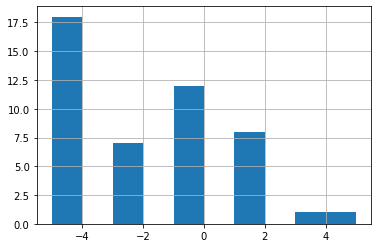

In [79]:
fwd_df['return_rolling'].hist()
fwd_df.sort_values('return_rolling',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
355,Ilkay Gündogan,Gündogan,MCI,18.8,58,1125,7,0,320,9,7.8,83,4.0,2.0,MID,14.3,1.3,1426978,47703,4.428080,9.000000,7.6,7.625,7.833333,8.000000,7.944444,5.0,9,1.400000,1.375000,-0.166667,-0.111111
8,Granit Xhaka,Xhaka,ARS,0.4,52,1354,1,1,220,7,3.5,42,1.0,NaN,MID,8.1,0.7,-35679,553,2.097618,3.666667,3.4,3.500,3.666667,3.533333,3.583333,5.0,7,0.266667,0.166667,0.133333,0.083333
276,Harvey Barnes,Barnes,LEI,7.7,69,1549,7,3,252,5,6.2,94,NaN,NaN,MID,13.6,0.9,275874,69743,3.400280,6.666667,6.2,6.125,7.000000,6.800000,6.555556,3.0,4,0.466667,0.541667,0.200000,0.444444
77,Solomon March,March,BHA,1.0,50,1604,2,2,273,6,2.5,66,5.0,NaN,MID,13.2,0.5,55044,-4065,2.151411,3.000000,2.4,2.750,3.000000,2.666667,2.583333,1.0,3,0.600000,0.250000,0.333333,0.416667
45,Jack Grealish,Grealish,AVL,39.1,77,1707,6,11,457,10,5.5,119,4.0,2.0,MID,15.5,0.7,2049912,105918,5.704210,6.666667,5.8,5.375,6.666667,6.066667,5.500000,3.0,3,0.866667,1.291667,0.600000,1.166667
60,Douglas Luiz Soares de Paulo,Soares de Paulo,AVL,0.2,49,1581,0,2,209,9,3.2,46,NaN,NaN,MID,9.4,0.7,-13491,-160,1.304513,3.666667,3.0,2.875,3.666667,3.333333,3.055556,1.0,3,0.666667,0.791667,0.333333,0.611111
81,Leandro Trossard,Trossard,BHA,0.6,57,1349,2,4,218,6,4.5,68,NaN,NaN,MID,11.9,0.8,-13062,326,3.112953,5.333333,5.8,4.375,6.500000,5.733333,5.083333,3.0,3,-0.466667,0.958333,0.766667,1.416667
365,Bernardo Mota Veiga de Carvalho e Silva,Veiga de Carvalho e Silva,MCI,1.0,74,1030,1,1,185,7,3.5,39,NaN,NaN,MID,5.3,0.5,5260,-1665,2.139233,5.333333,4.0,3.375,4.333333,4.200000,3.750000,3.0,3,1.333333,1.958333,0.133333,0.583333
69,Pascal Groß,Groß,BHA,0.3,58,983,2,3,242,4,3.8,58,3.0,1.0,MID,10.0,0.7,584,-523,3.064388,5.000000,3.0,2.250,6.000000,4.400000,3.305556,1.0,3,2.000000,2.750000,1.600000,2.694444
91,Alexis Mac Allister,Mac Allister,BHA,0.0,53,450,1,1,88,3,3.2,27,4.0,NaN,MID,5.1,0.6,-2757,26,2.305273,3.666667,2.6,1.875,3.166667,3.000000,2.500000,1.0,3,1.066667,1.791667,0.166667,0.666667


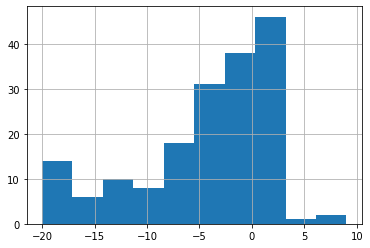

In [80]:
mid_df['returned'].hist()
mid_df.sort_values('returned',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
8,Granit Xhaka,Xhaka,ARS,0.4,52,1354,1,1,220,7,3.5,42,1.0,NaN,MID,8.1,0.7,-35679,553,2.097618,3.666667,3.4,3.500,3.666667,3.533333,3.583333,5.0,7,0.266667,0.166667,0.133333,0.083333
355,Ilkay Gündogan,Gündogan,MCI,18.8,58,1125,7,0,320,9,7.8,83,4.0,2.0,MID,14.3,1.3,1426978,47703,4.428080,9.000000,7.6,7.625,7.833333,8.000000,7.944444,5.0,9,1.400000,1.375000,-0.166667,-0.111111
45,Jack Grealish,Grealish,AVL,39.1,77,1707,6,11,457,10,5.5,119,4.0,2.0,MID,15.5,0.7,2049912,105918,5.704210,6.666667,5.8,5.375,6.666667,6.066667,5.500000,3.0,3,0.866667,1.291667,0.600000,1.166667
81,Leandro Trossard,Trossard,BHA,0.6,57,1349,2,4,218,6,4.5,68,NaN,NaN,MID,11.9,0.8,-13062,326,3.112953,5.333333,5.8,4.375,6.500000,5.733333,5.083333,3.0,3,-0.466667,0.958333,0.766667,1.416667
64,Bertrand Traoré,Traoré,AVL,0.6,59,925,4,2,207,6,4.0,62,5.0,NaN,MID,10.5,0.7,39439,-2428,3.364560,4.333333,4.6,5.625,3.500000,4.000000,4.500000,3.0,1,-0.266667,-1.291667,-0.500000,-1.000000
276,Harvey Barnes,Barnes,LEI,7.7,69,1549,7,3,252,5,6.2,94,NaN,NaN,MID,13.6,0.9,275874,69743,3.400280,6.666667,6.2,6.125,7.000000,6.800000,6.555556,3.0,4,0.466667,0.541667,0.200000,0.444444
273,James Maddison,Maddison,LEI,14.0,73,1291,6,5,297,7,6.8,89,1.0,4.0,MID,12.2,0.9,905751,51019,4.109802,5.000000,6.8,5.125,4.500000,5.666667,5.500000,3.0,1,-1.800000,-0.125000,-1.166667,-1.000000
270,Youri Tielemans,Tielemans,LEI,3.0,64,1833,5,2,369,7,6.8,86,2.0,3.0,MID,13.4,1.1,42940,5488,3.806636,5.000000,6.8,5.125,4.833333,6.000000,5.666667,3.0,-1,-1.800000,-0.125000,-1.166667,-0.833333
390,Paul Pogba,Pogba,MUN,2.9,77,1307,3,2,243,5,5.4,64,3.0,3.0,MID,8.3,0.7,52842,-9958,3.185533,4.333333,5.4,4.500,3.166667,4.133333,4.583333,3.0,1,-1.066667,-0.166667,-0.966667,-1.416667
395,Bruno Miguel Borges Fernandes,Borges Fernandes,MUN,56.2,114,1745,11,9,522,7,3.0,145,1.0,1.0,MID,12.7,0.3,2954087,7470,4.979004,3.333333,3.0,5.375,3.000000,3.066667,4.027778,3.0,1,0.333333,-2.041667,-0.066667,-1.027778


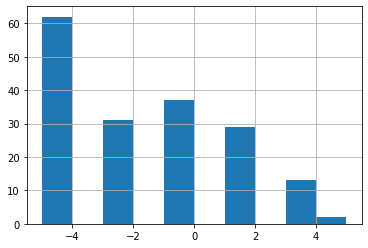

In [81]:
mid_df['return_rolling'].hist()
mid_df.sort_values('return_rolling',ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
377,Rúben Santos Gato Alves Dias,Gato Alves Dias,MCI,18.6,60,1599,0,1,401,12,6.8,91,NaN,NaN,DEF,15.2,1.1,1394182,163496,3.076901,7.000000,7.8,7.000,7.166667,7.600000,7.166667,5.0,5,-0.800000,0.000000,-0.433333,0.000000
367,Oleksandr Zinchenko,Zinchenko,MCI,0.4,55,524,0,0,145,5,5.7,35,NaN,NaN,DEF,6.4,1.0,-3110,4203,2.826100,6.000000,6.4,4.250,6.000000,6.133333,5.388889,5.0,5,-0.400000,1.750000,-0.133333,0.611111
50,Matt Targett,Targett,AVL,7.4,47,1694,0,3,385,11,7.0,84,6.0,NaN,DEF,17.9,1.5,486911,72422,3.404503,7.333333,5.8,5.375,6.333333,6.333333,5.722222,3.0,4,1.533333,1.958333,0.000000,0.611111
85,Ben White,White,BHA,1.2,44,1759,0,0,316,6,5.5,55,NaN,NaN,DEF,12.5,1.2,-33098,2289,2.519448,6.666667,4.6,3.250,6.666667,5.666667,4.388889,1.0,3,2.066667,3.416667,1.000000,2.277778
79,Joël Veltman,Veltman,BHA,0.5,43,1200,0,0,228,4,5.5,43,NaN,NaN,DEF,10.0,1.3,5259,1206,2.819152,7.000000,4.6,3.250,6.833333,5.733333,4.500000,1.0,3,2.400000,3.750000,1.100000,2.333333
78,Adam Webster,Webster,BHA,1.4,44,1800,0,0,300,6,4.5,53,NaN,NaN,DEF,12.0,1.0,-92151,-442,2.227533,5.666667,3.8,3.000,5.833333,4.800000,3.861111,1.0,3,1.866667,2.666667,1.033333,1.972222
74,Lewis Dunk,Dunk,BHA,2.6,48,1620,2,0,310,5,5.5,57,1.0,NaN,DEF,11.9,1.1,-383693,1435,3.333809,6.666667,5.8,5.000,6.333333,5.933333,5.500000,3.0,3,0.866667,1.666667,0.400000,0.833333
588,Aaron Cresswell,Cresswell,WHU,21.3,55,1890,0,8,453,7,4.8,96,1.0,NaN,DEF,17.5,0.9,1489843,98568,3.668398,3.666667,6.0,5.125,4.000000,4.866667,5.277778,3.0,2,-2.333333,-1.458333,-0.866667,-1.277778
606,Craig Dawson,Dawson,WHU,0.5,45,540,2,0,126,3,6.0,36,NaN,NaN,DEF,8.0,1.3,36442,8596,3.218741,6.000000,6.0,4.500,6.833333,6.333333,5.638889,3.0,2,0.000000,1.500000,0.500000,1.194444
136,César Azpilicueta,Azpilicueta,CHE,2.7,56,860,1,1,216,6,5.6,53,NaN,NaN,DEF,9.5,1.0,-332668,21192,3.842122,7.333333,5.6,4.500,9.833333,7.600000,5.777778,1.0,2,1.733333,2.833333,2.233333,4.055556


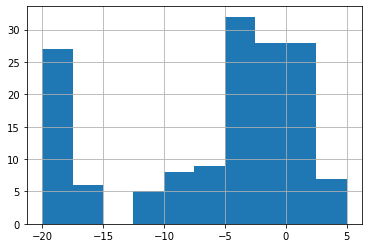

In [82]:
def_df['returned'].hist()
def_df.sort_values('returned',ascending=False).head(10)

In [90]:
slim_elements_df.sort_values(by=['form','pt_vol'],ascending=False).head(10)

,first_name,second_name,team,selected_by_percent,now_cost,minutes,goals_scored,assists,bps,clean_sheets,form,total_points,direct_freekicks_order,penalties_order,position,ptPerMil,formPerMil,net_transfers,net_transfers_event,pt_vol,3g_form,5g_form,8g_form,wgt_3g_form,wgt_5g_form,wgt_8g_form,return_rolling,returned,3v5_trend,3v8_trend,wgt_3v5_trend,wgt_3v8_trend
570,Matheus Pereira,Pereira,WBA,1.9,56,1272,5,4,278,2,9.8,73,1.0,NaN,MID,13.0,1.8,-68379,59505,4.501323,8.000000,8.2,5.750,8.666667,8.800000,7.388889,1.0,1,-0.200000,2.250000,-0.133333,1.277778
355,Ilkay Gündogan,Gündogan,MCI,18.8,58,1125,7,0,320,9,7.8,83,4.0,2.0,MID,14.3,1.3,1426978,47703,4.428080,9.000000,7.6,7.625,7.833333,8.000000,7.944444,5.0,9,1.400000,1.375000,-0.166667,-0.111111
50,Matt Targett,Targett,AVL,7.4,47,1694,0,3,385,11,7.0,84,6.0,NaN,DEF,17.9,1.5,486911,72422,3.404503,7.333333,5.8,5.375,6.333333,6.333333,5.722222,3.0,4,1.533333,1.958333,0.000000,0.611111
357,John Stones,Stones,MCI,20.4,52,990,2,0,297,9,6.8,77,NaN,NaN,DEF,14.8,1.3,1539202,-22839,5.112163,4.000000,7.8,6.875,3.000000,6.000000,6.472222,3.0,-1,-3.800000,-2.875000,-3.000000,-3.472222
273,James Maddison,Maddison,LEI,14.0,73,1291,6,5,297,7,6.8,89,1.0,4.0,MID,12.2,0.9,905751,51019,4.109802,5.000000,6.8,5.125,4.500000,5.666667,5.500000,3.0,1,-1.800000,-0.125000,-1.166667,-1.000000
270,Youri Tielemans,Tielemans,LEI,3.0,64,1833,5,2,369,7,6.8,86,2.0,3.0,MID,13.4,1.1,42940,5488,3.806636,5.000000,6.8,5.125,4.833333,6.000000,5.666667,3.0,-1,-1.800000,-0.125000,-1.166667,-0.833333
377,Rúben Santos Gato Alves Dias,Gato Alves Dias,MCI,18.6,60,1599,0,1,401,12,6.8,91,NaN,NaN,DEF,15.2,1.1,1394182,163496,3.076901,7.000000,7.8,7.000,7.166667,7.600000,7.166667,5.0,5,-0.800000,0.000000,-0.433333,0.000000
315,Raphael Dias Belloli,Dias Belloli,LEE,1.3,54,1076,3,4,215,4,6.7,60,4.0,NaN,MID,11.1,1.2,96461,-4537,3.768289,6.666667,6.0,5.250,7.166667,6.333333,5.861111,1.0,2,0.666667,1.416667,0.833333,1.305556
22,Bukayo Saka,Saka,ARS,10.6,54,1503,5,3,285,6,6.2,81,6.0,NaN,MID,15.0,1.1,289944,-104320,4.040863,7.333333,6.6,6.750,5.833333,6.200000,6.611111,3.0,-1,0.733333,0.583333,-0.366667,-0.777778
276,Harvey Barnes,Barnes,LEI,7.7,69,1549,7,3,252,5,6.2,94,NaN,NaN,MID,13.6,0.9,275874,69743,3.400280,6.666667,6.2,6.125,7.000000,6.800000,6.555556,3.0,4,0.466667,0.541667,0.200000,0.444444
